In [9]:
#Adds higher directory to path, so we can access /ATS
import sys
sys.path.append("../")

from ATS.general import *
from ATS.QAQC import *

import pandas as pd

# Set the DataFram in pandas to show all columns and 1000 rows. Display plots inline
pd.options.display.max_columns = None
pd.set_option('display.max_rows', 1000)

# Load, merge, and Subset Data

<Item title:"SAC_Nest_Monitoring_RT" type:Feature Layer Collection owner:Anooshi>
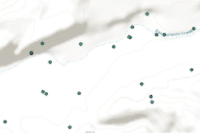

In [10]:
# Load data from arcGIS online
output = arcGIS_data_load('9d40dac485004c0c959eddab728b346c')

nests = output['data0']
observations = output['table0']
feature_service = output['feature_service']

In [11]:
# Merge related table and feature layer
data = nests.merge(observations, left_on='GlobalID', right_on='Ref_to_Nests', how='inner')
data = data.drop(columns=['GlobalID_x','Ref_to_Nests'])
data = data.rename(columns={'GlobalID_y':'GlobalID'})

In [17]:
# Subset by year
data.rename(columns={"SurveyDate": "Date"}, inplace=True)
sYear = input("Start Year? (YYYY)")
sub = year_subset(data, sYear)

Start Year? (YYYY) 2020

Analysis for 2020-10-01 07:00 UTC to 2021-10-01 07:00 UTC
Entries in Subset: 85


# QAQC

In [6]:
#QAQC Check number of records matches on ArcGIS online
print('Subset \n# of rows:\n', sub.shape[0])
print('# of columns:\n',sub.shape[1])

Subset 
# of rows:
 85
# of columns:
 20


In [5]:
# QAQC Find blank entries
find_blank_entries(data, exclude_cols=['Comments', 'Surveyor_2','Young_Status','Buffer_Pres','Adult_Activity','Num_Young','Num_Eggs','Active_Date','Num_Fledge','Nest_Substrate'])


No blank Observation_Date
No blank GlobalID
No blank Species_Com
No blank Nest_Status_y
No blank BHR_Site
No blank OBJECTID_x
No blank SHAPE
Blank Surveyor_1 entrie(s) exist!


,OBJECTID_x,BHR_Site,Feature_ID,Species_Com,Nest_Status_x,SHAPE,OBJECTID_y,Observation_Date,Surveyor_1,Surveyor_2,Nest_Status_y,Buffer_Pres,Num_Eggs,Nest_Substrate,Young_Status,Adult_Activity,Num_Young,Num_Fledge,Comments,GlobalID
14,3,SAC,BUOW01,Burrowing Owl,Inactive,"{'x': 6186203.140157476, 'y': 2034542.9099056423, 'spatialReferenc...",3,2018-03-27 14:00:00,None,None,Inactive,No,0.0,None,None,No adults present,0.0,0.0,,7c527784-8413-4298-8c47-040e2c2568e2


No blank Nest_Status_x
No blank Feature_ID
No blank OBJECTID_y


In [12]:
validate_domains(feature_service)



Table/Layer:  Observations


The following entries are not within the domain:


,Field,Data
0,Surveyor_1,"{Joy Stewart, Jackson Sabol, Janel Mayo, Richard Graham-Bruno, Ryan Swanson}"
0,Surveyor_2,{Richard Graham-Bruno}
0,Nest_Status,{}
0,Buffer_Pres,{}
0,Young_Status,{}
0,Adult_Activity,{}




Table/Layer:  Nests


No Mismatches Found


In [10]:
QAQC_whitespace(data, exclude_cols=['Comments', 'Surveyor_2'], objectID=['OBJECTID_x', 'OBJECTID_y'])



Analysis for: Buffer_Pres
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: Nest_Substrate
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: BHR_Site
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: Nest_Status_y
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: SHAPE
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: Feature_ID
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: GlobalID
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: Species_Com
No \xa0 characters found
No double spaces found
No triple spaces found
No tra

In [11]:
find_blank_entries(data, exclude_cols=['Comments', 'Surveyor_2', 'Buffer_Pres', 'Active_Date', 'Num_Eggs', 'Num_Fledge', 'Num_Young', 'Young_Status', 'Adult_Activity', 'Nest_Substrate'])

No blank OBJECTID_x
No blank Observation_Date
No blank BHR_Site
No blank Nest_Status_y
No blank Feature_ID
No blank SHAPE
No blank GlobalID
No blank Species_Com
No blank Nest_Status_x
No blank OBJECTID_y
Blank Surveyor_1 entrie(s) exist!


,OBJECTID_x,BHR_Site,Feature_ID,Species_Com,Nest_Status_x,SHAPE,OBJECTID_y,Observation_Date,Surveyor_1,Surveyor_2,Nest_Status_y,Buffer_Pres,Num_Eggs,Nest_Substrate,Young_Status,Adult_Activity,Num_Young,Num_Fledge,Comments,GlobalID
14,3,SAC,BUOW01,Burrowing Owl,Inactive,"{'x': 6186203.140157476, 'y': 2034542.9099056423, 'spatialReferenc...",3,2018-03-27 14:00:00,None,None,Inactive,No,0.0,None,None,No adults present,0.0,0.0,,7c527784-8413-4298-8c47-040e2c2568e2


/home/user/SAC/../ATS/QAQC.py:134: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[plt_r,plt_c].set_xticklabels(r['DateString'], rotation='vertical')


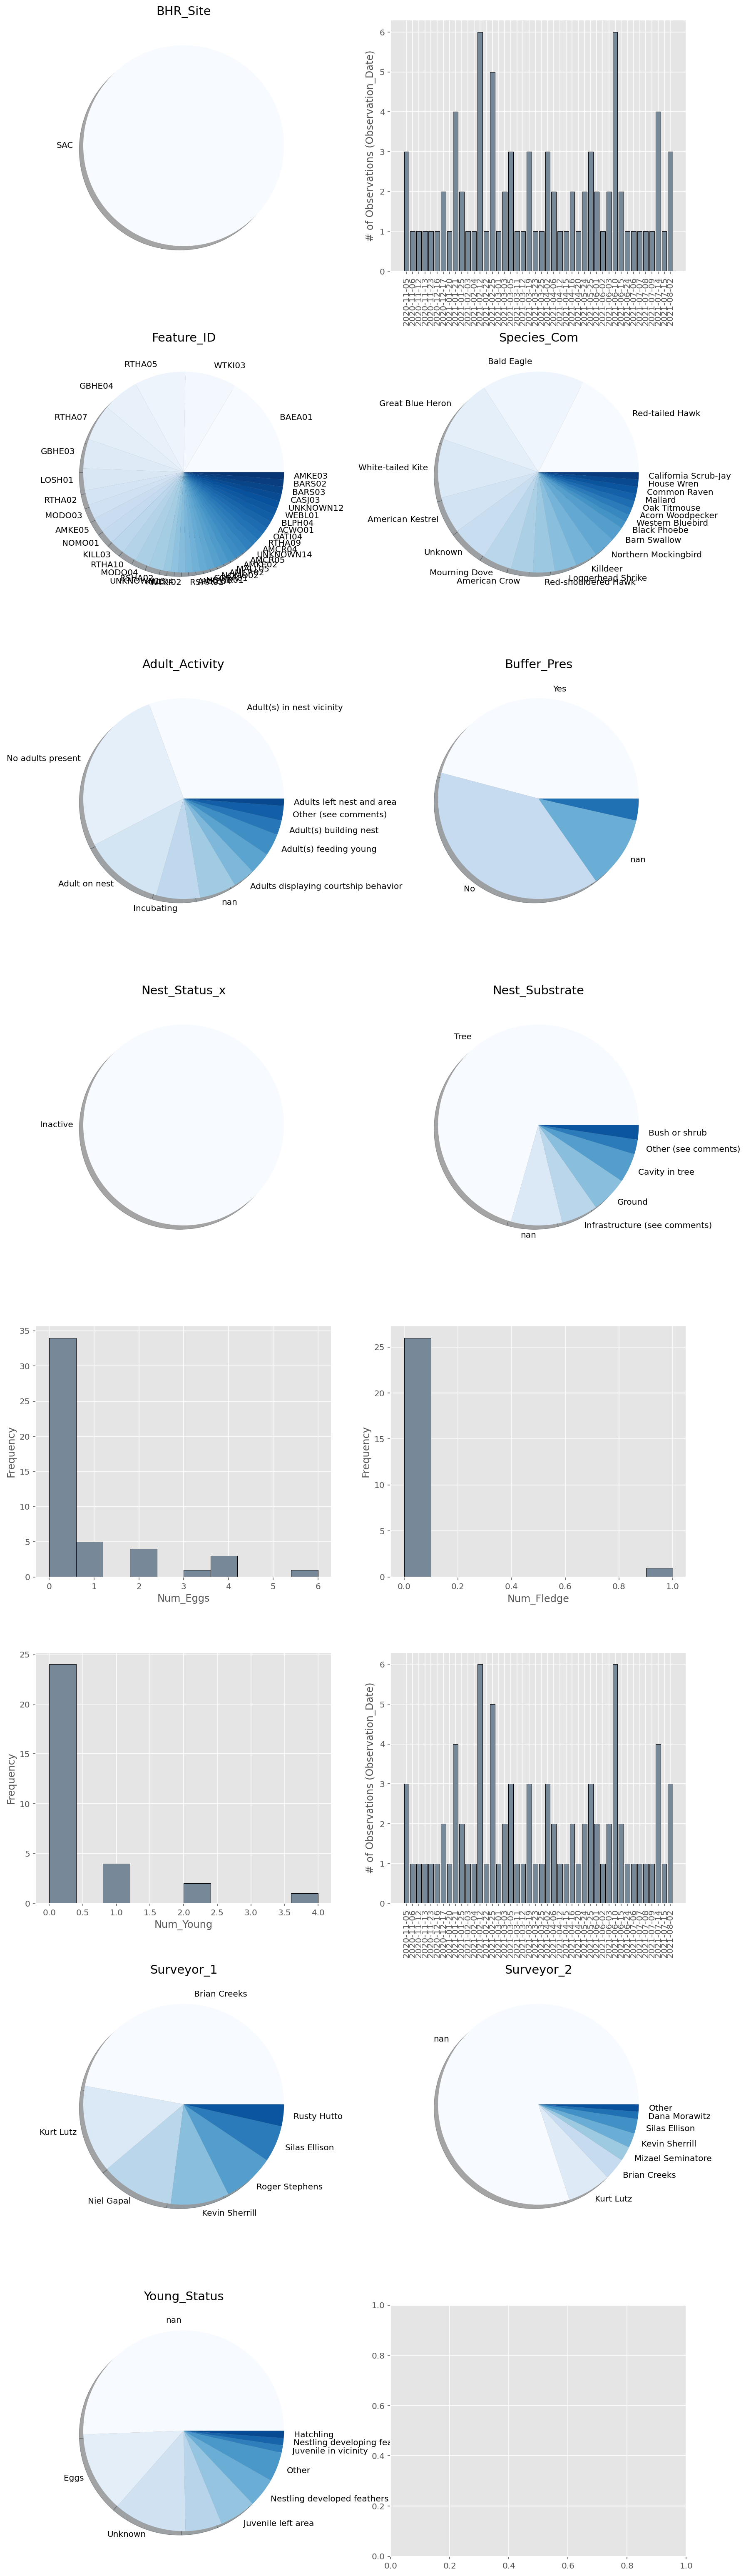

In [13]:
QAQC_plot(sub, cols_to_plot=['BHR_Site', 'Observation_Date','Feature_ID',  'Species_Com',
       'Adult_Activity', 'Buffer_Pres', 'Nest_Status_x',
       'Nest_Substrate', 'Num_Eggs', 'Num_Fledge', 'Num_Young',
       'Observation_Date', 'Surveyor_1', 'Surveyor_2', 'Young_Status'])

Dropping surveyors with less than 4.25 observations
They did not make over 5% of total observation
Dropping Surveyors: ['Other' 'Rusty Hutto']


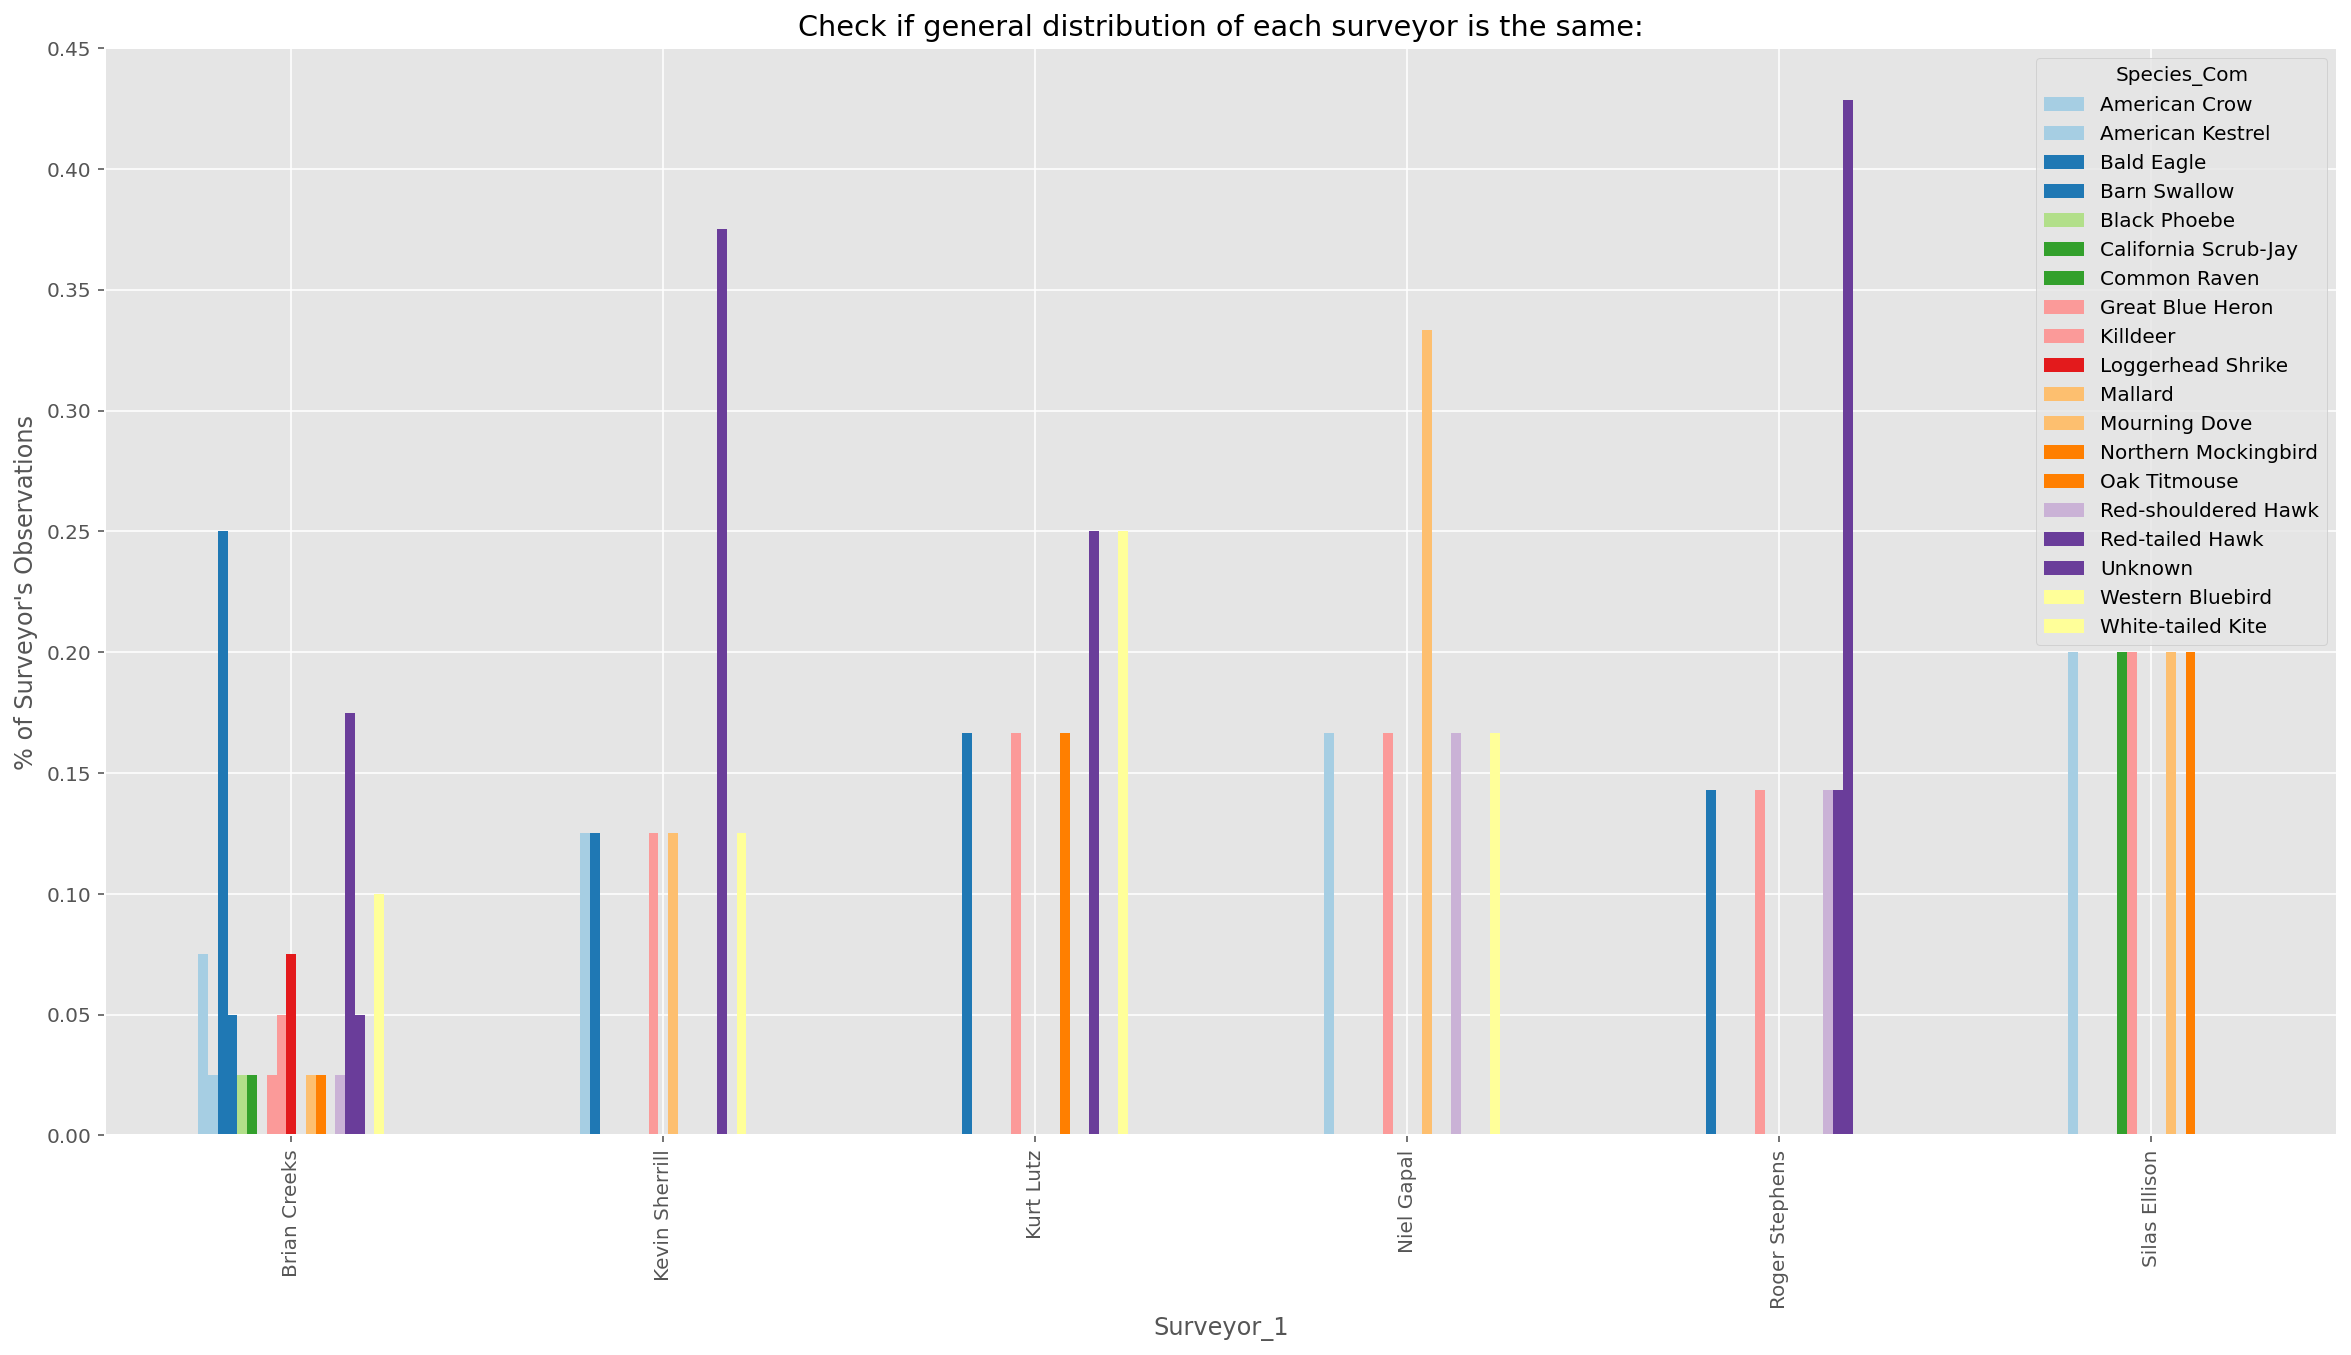

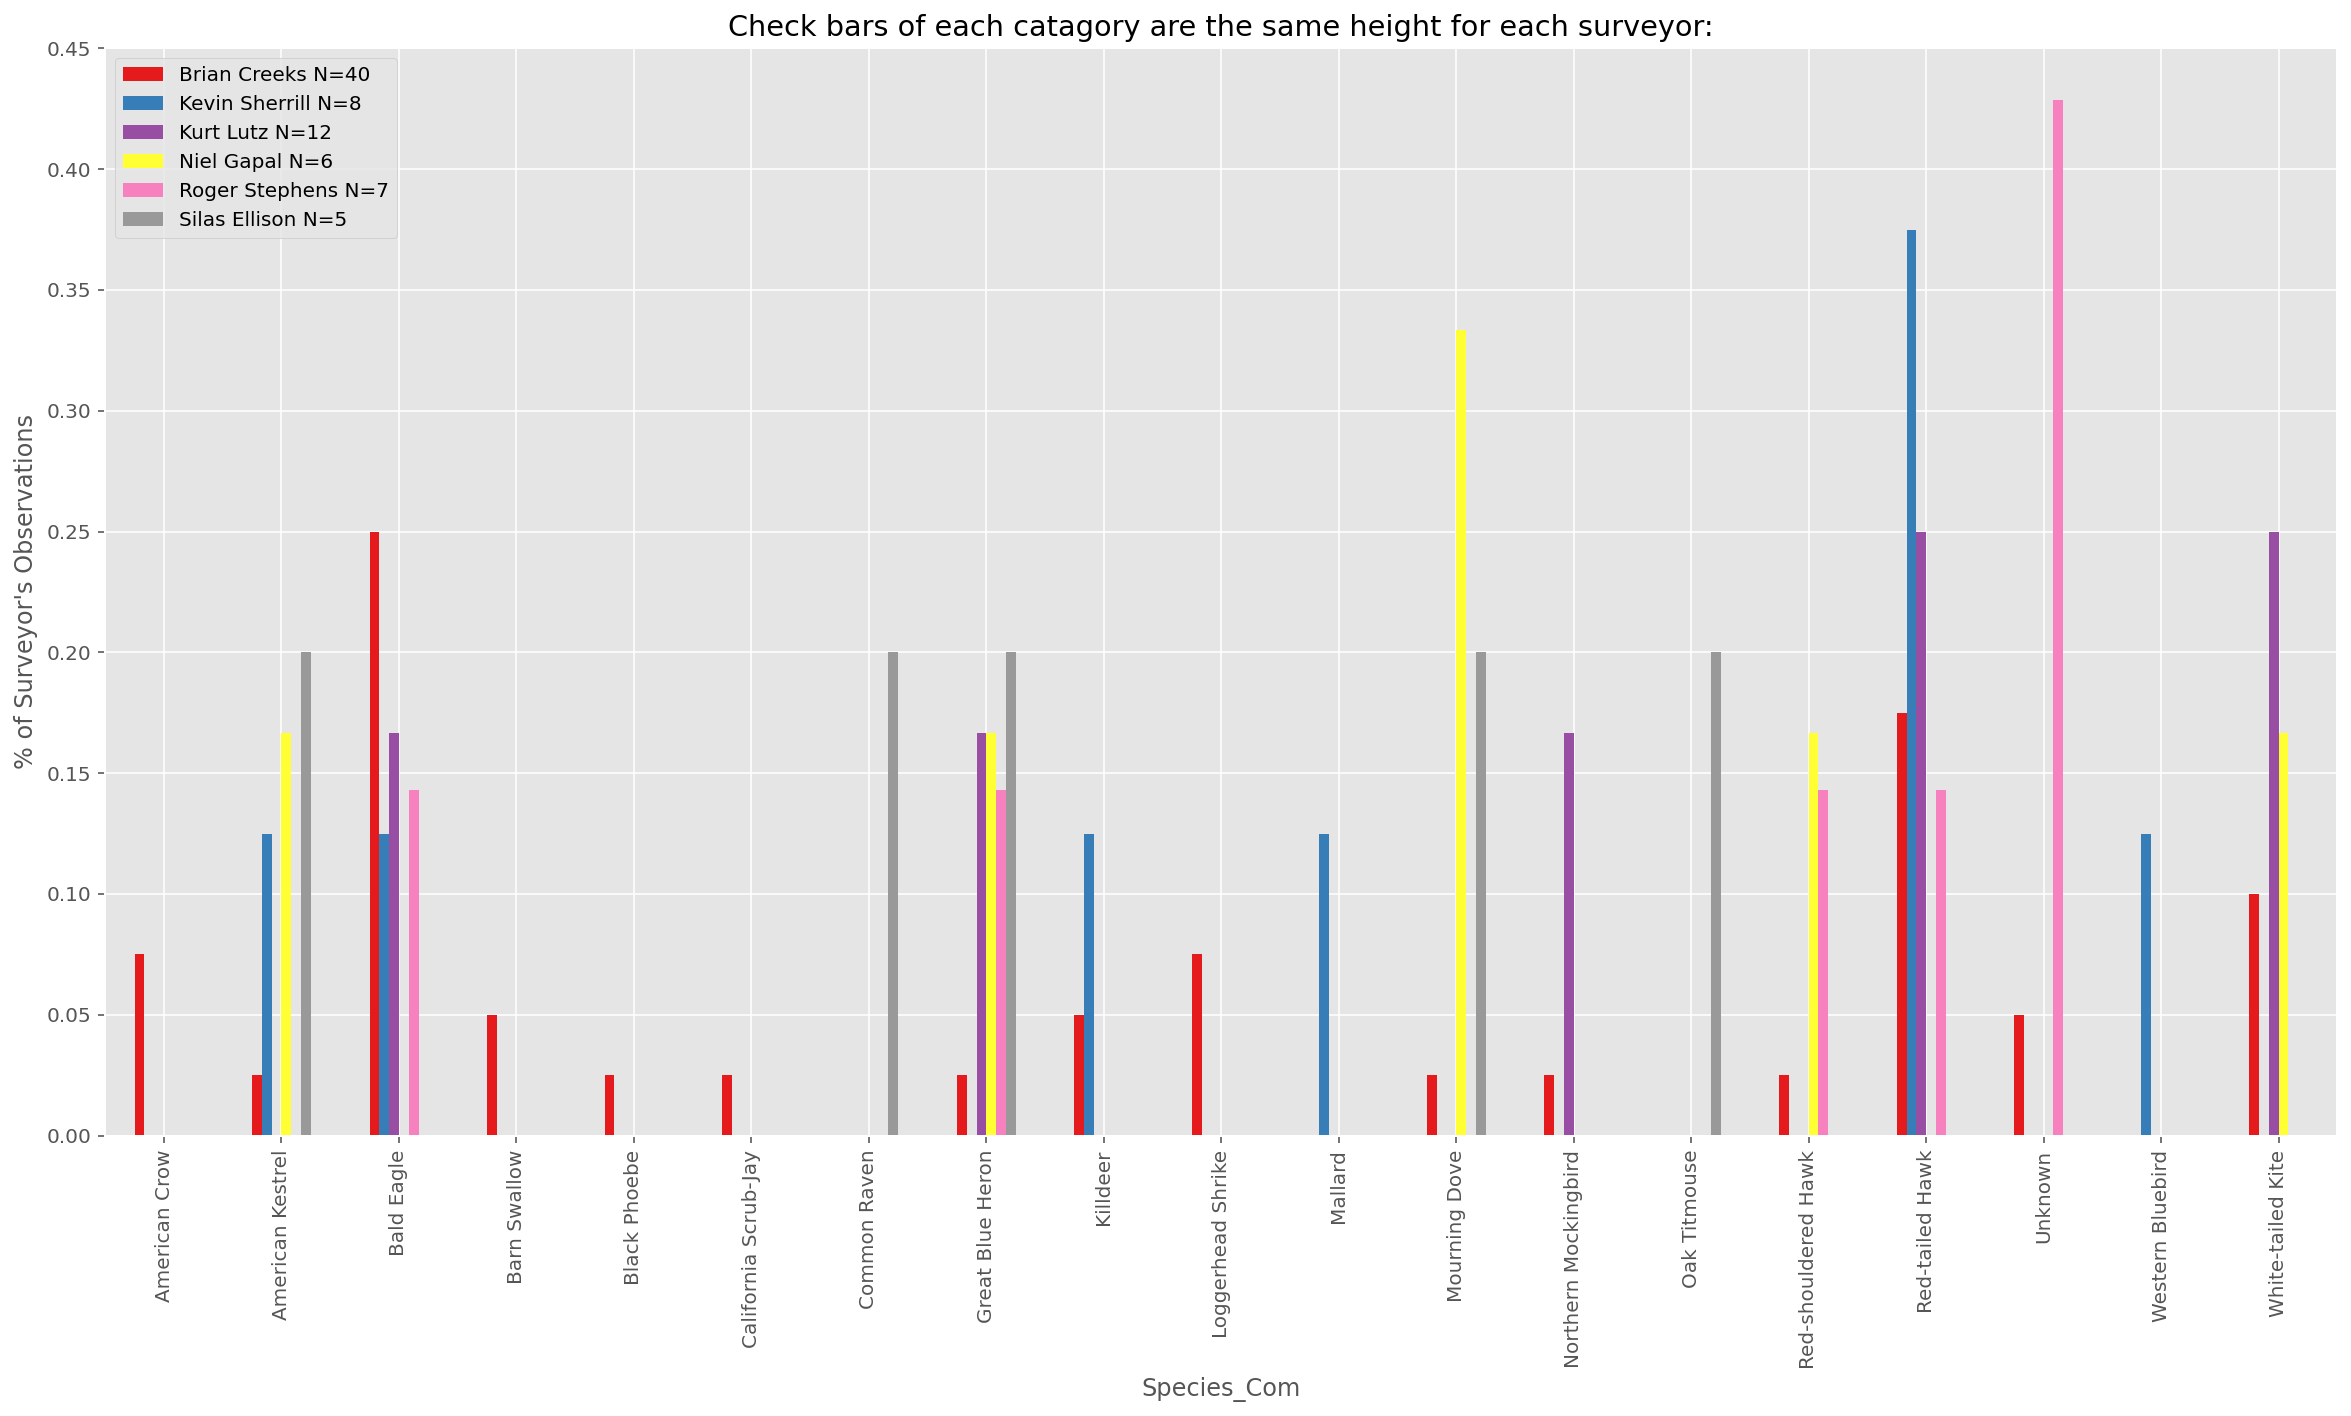

In [14]:
compare_surveyors(sub, 'Species_Com', 'Surveyor_1', 5)

In [20]:
QAQC_attachment_filenames(feature_service)


No attachments for layer/table Nests



No mislabeled photos found for layer/table Observations


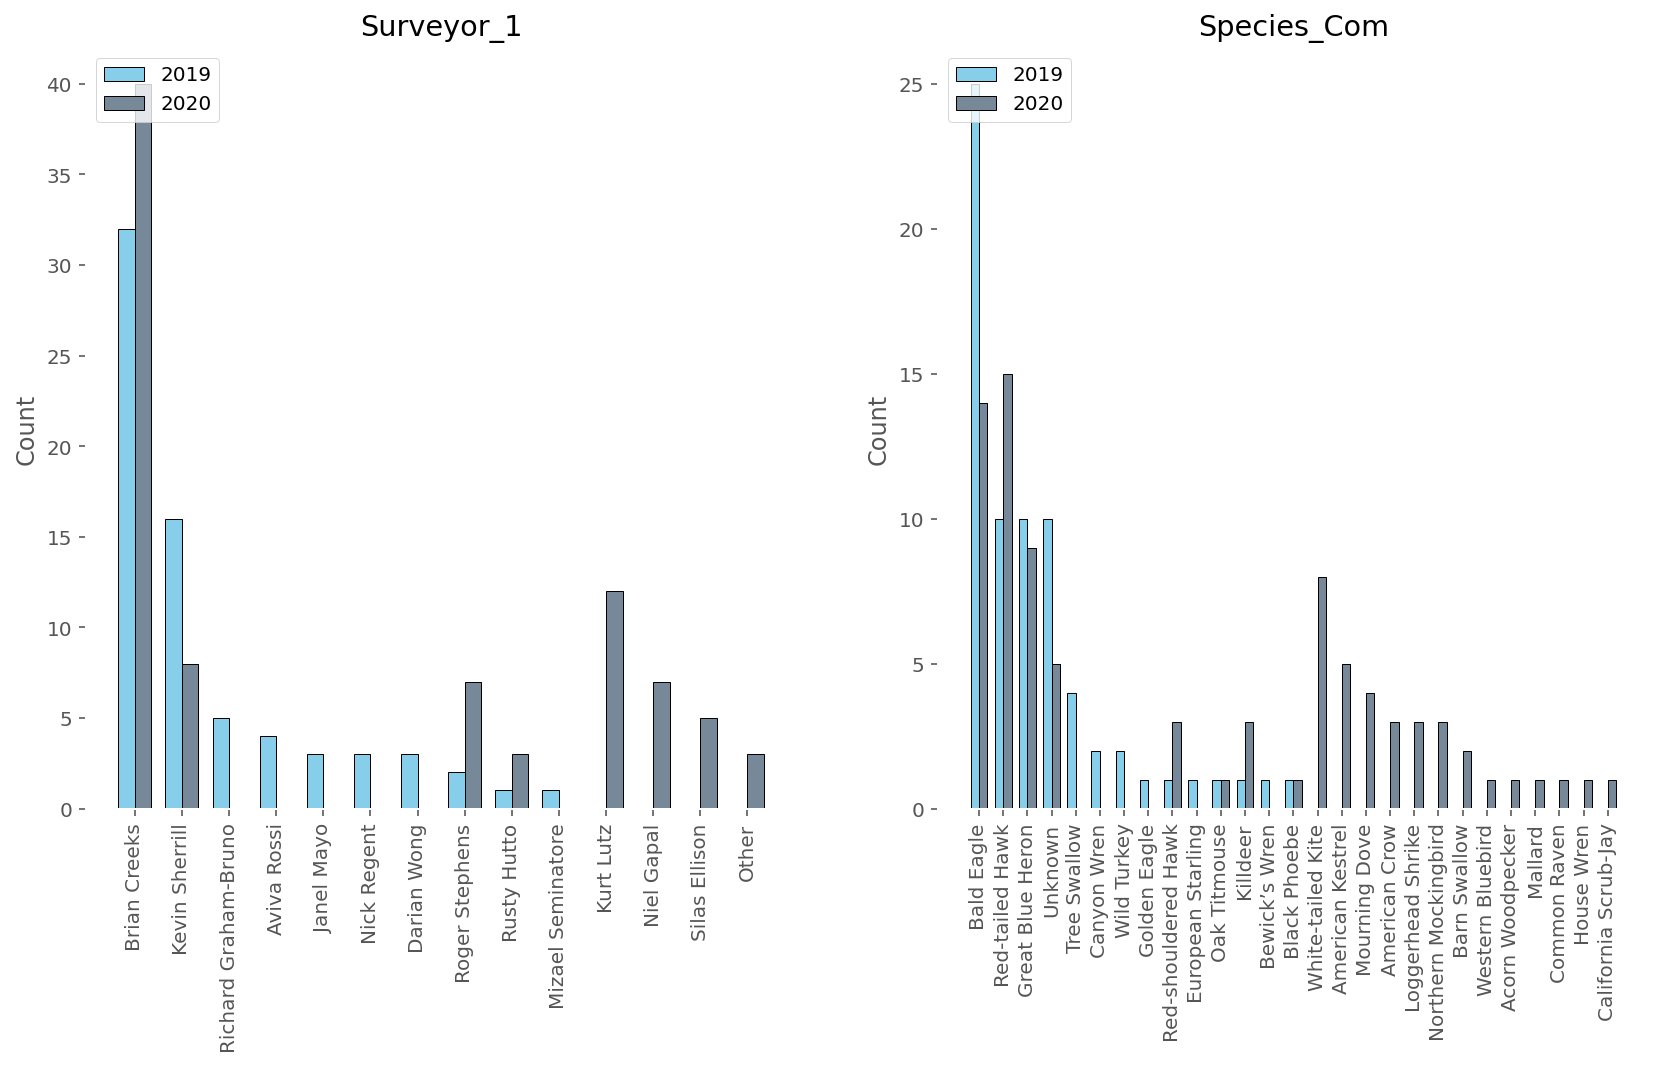

In [21]:
compare_years_catagorical(data,['Surveyor_1','Species_Com'],'2019','2020')

In [22]:
#QAQC Manually check that nest records have Feature_ID in AGOL, adding new Feature_IDs if necessary for newer nests.

# Export Data Deliverable

In [18]:
data.columns

Index(['OBJECTID_x', 'BHR_Site', 'Feature_ID', 'Species_Com', 'Nest_Status_x',
       'SHAPE', 'OBJECTID_y', 'Observation_Date', 'Surveyor_1', 'Surveyor_2',
       'Nest_Status_y', 'Buffer_Pres', 'Num_Eggs', 'Nest_Substrate',
       'Young_Status', 'Adult_Activity', 'Num_Young', 'Num_Fledge', 'Comments',
       'GlobalID'],
      dtype='object')

In [19]:
# drop and rename columns
data = data.drop(columns=['Nest_Status_y'])
data = data.rename(columns={'OBJECTID_x':'Object ID (Observation)','OBJECTID_y':'Object ID (Nest)', 'GlobalID':'Global ID', 'Nest_Status_x':'Nest Status'})

In [22]:
field_order = [
    'BHR_Site',
    'Observation_Date',
    'Surveyor_1',
    'Surveyor_2',
    'Species_Com',
    'Nest_Substrate',
    'Nest Status',
    'Buffer_Pres',
    'Num_Eggs',
    'Num_Young',
    'Num_Fledge',
    'Young_Status',
    'Adult_Activity',
    'Comments',
    'Object ID (Observation)',
    'Object ID (Nest)',
    'Feature_ID',
    'Global ID',
    'SHAPE'
]

In [23]:
export_data_deliverable(data, feature_service, field_order, file_name='Nest_Monitoring')

Exported to Outputs/Nest_Monitoring_Data_20211029.xlsx
